2. In this problem you will use numpy to program the feed-forward phase for a deep multilayer perceptron (MLP) neural network. We provide you with a pre-trained MLP using the MNIST dataset. The MLP has an input layer with 784-neurons, 2 hidden layers of 200 and 100 neurons, and a 10-neuron output
layer. The model assumes ReLU activation for the hidden layers and softmax function in the output layer.

In [ ]:
# Importing the necessary libraries.
import numpy as np
import h5py
import math
import matplotlib.pyplot as plt
import json

In [ ]:
# Extracting the weights and bias from the dataset file.
file = h5py.File("mnist_network_params.hdf5")
w1 = file['W1'][:]
w2 = file['W2'][:]
w3 = file['W3'][:]
b1 = file['b1'][:]
b2 = file['b2'][:]
b3 = file['b3'][:]

(a) Extract the weights and biases of the pre-trained network from mnist network params.hdf5. The file has 6 keys corresponding to: W 1, b 1, W 2, b 2, W 3, b 3. Verify the dimension of each
numpy array with the shape property.

In [ ]:
print("Dimensions of weight-1: ", w1.shape)
print("Dimensions of weight-2: ",w2.shape)
print("Dimensions of weight-3: ",w3.shape)
print("Dimensions of bias-1: ",b1.shape)
print("Dimensions of bias-2: ",b2.shape)
print("Dimensions of bias-3: ",b3.shape)

Dimensions of weight-1:  (200, 784)
Dimensions of weight-2:  (100, 200)
Dimensions of weight-3:  (10, 100)
Dimensions of bias-1:  (200,)
Dimensions of bias-2:  (100,)
Dimensions of bias-3:  (10,)


In [ ]:
# Extracting the test dataset file.
filetest = h5py.File("mnist_testdata.hdf5")
xtestdata = filetest['xdata'][:]
ytestdata = filetest['ydata'][:]

(b) The file mnist testdata.hdf5 contains 10,000 images. xtestdata holds pixel intensities and ytestdata contains the corresponding class labels. Extract these. Note: each image vector is 784-
dimensions and the label is 10-dimensional with one-hot encoded, i.e., label [0,0,0,1,0,0,0,0,0,0] means the image is class “3”.

In [ ]:
print("Dimensions of the x test data: ", xtestdata.shape)
print("Dimensions of the y test data: ", ytestdata.shape)

Dimensions of the x test data:  (10000, 784)
Dimensions of the y test data:  (10000, 10)


(c) Write functions to calculate ReLU and softmax:
• ReLU (x) = max (0, x).
• Softmax (x) = he Px1n i=1 exi, e Px2n i=1 exi, . . . ,e Pxnn i=1 exii.
The softmax function takes a vector of size n and returns another vector of size n that you can interpret as a probability distribution. For example: Softmax([0; 1; 2]) = [0:09; 0:24; 0:67] so you can conclude that the 3rd element is the most likely outcome.

In [ ]:
# Defining the ReLU(x) function.
def ReLU(x):
    ele = [0 if x < 0 else x for x in x] 
    ele = np.array(ele)
    
    return ele

In [ ]:
# Defining the Softmax(x) function.
def Soft_Max(var):
    d = np.sum(np.exp(var))
    prediction = []
    
    for iter in range(len(var)):
        num = math.exp(var[iter])
        prediction.append(num / d)
    
    prediction = np.array(prediction)
    
    return prediction

(d) Use numpy to create an MLP to classify 784-dimensional images into the target 10-dimensional output. Use ReLU activation for the two hidden layers and softmax the output layer. Output index and activation as integers (not string) and include only the 10 final-layer output
activations as numeric floats.

In [ ]:
range(xtestdata[0].shape[0])

range(0, 784)

In [ ]:
# Defining the Multi-Layer Perceptron (MLP) neural network.
def MLP(xi,yi):
    dataset_list = []
    accuracy = []

    for data in range(xi.shape[0]):
        out1 = ReLU(np.matmul(w1, xi[data]) + b1)
        out2 = ReLU(np.matmul(w2, out1) + b2)
        out3 = Soft_Max(np.matmul(w3, out2) + b3)
        classification = int(np.argmax(out3))
        
        if yi[data][classification] > 0.0: # Treshold/benchmark condition for the accuracy.
            accuracy.append(1)
        else:
            accuracy.append(0)

        output_dict = {"index": data,"activations": list(out3), "classification": classification}
        dataset_list.append(output_dict)

    return dataset_list, accuracy

In [ ]:
output_data, final_accuracy  = MLP(xtestdata, ytestdata) # Function call.
# Printing the output as a json file for autolab.
with open("result.json", "w") as Output_file:
    Output_file.write(json.dumps(output_data))

(e) Compare your prediction with the (true) ytestdata label. Count the classification as correct if the position of the maximum element in your prediction matches with the position of the 1 in ytestdata. Tally the number of correctly classified images from the whole set of 10,000. [hint:9790 correct].

In [ ]:
true_classification = final_accuracy.count(1)
if true_classification == 9790:
  print("The number of correct predictions/classifications: ", true_classification, "\nQuite Easily Done (QED)")
else:
  print("The number of correct predictions/classifications is wrong")

The number of correct predictions/classifications:  9790 
Quite Easily Done (QED)


(f) Identify and investigate several datapoints that your MLP classified correctly and several it classified incorrectly. Inspect them visually. Is the correct class obvious to you in the incorrect cases?

In [ ]:
false_classification = []
for index, elements in enumerate(final_accuracy):
  if elements == 0:
    false_classification.append(index)
print("The indices of wrongly classified images \n", false_classification)

The indices of wrongly classified images 
 [8, 115, 247, 321, 340, 381, 445, 449, 495, 551, 582, 613, 619, 646, 659, 684, 707, 720, 900, 947, 951, 965, 1003, 1014, 1032, 1039, 1112, 1128, 1156, 1178, 1182, 1224, 1226, 1232, 1242, 1247, 1299, 1319, 1328, 1378, 1444, 1522, 1530, 1549, 1553, 1609, 1621, 1626, 1670, 1681, 1709, 1717, 1790, 1850, 1878, 1901, 1911, 1940, 1941, 1984, 1987, 2035, 2070, 2098, 2109, 2118, 2130, 2135, 2182, 2185, 2272, 2280, 2293, 2387, 2414, 2488, 2512, 2514, 2582, 2597, 2607, 2648, 2654, 2877, 2896, 2921, 2939, 2953, 2995, 3060, 3062, 3073, 3117, 3342, 3422, 3490, 3503, 3520, 3533, 3549, 3558, 3559, 3597, 3702, 3718, 3727, 3757, 3780, 3811, 3818, 3853, 3869, 3893, 3906, 3926, 3941, 3943, 3985, 4065, 4075, 4078, 4093, 4123, 4163, 4176, 4199, 4201, 4224, 4248, 4271, 4289, 4294, 4384, 4425, 4497, 4534, 4536, 4601, 4671, 4740, 4761, 4807, 4823, 4839, 4860, 4879, 4880, 4956, 5138, 5199, 5331, 5457, 5634, 5642, 5676, 5734, 5835, 5887, 5936, 5937, 5955, 5973, 5981, 60

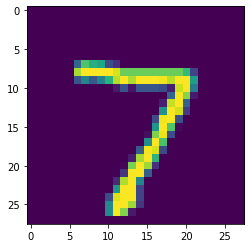

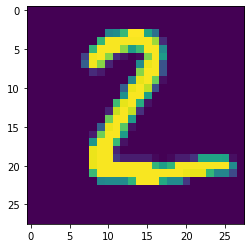

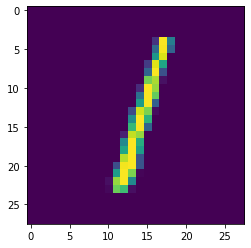

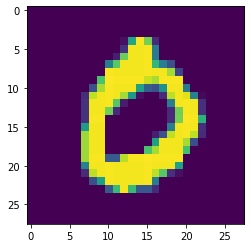

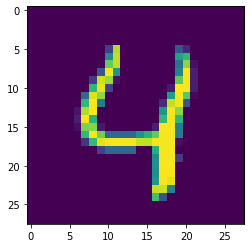

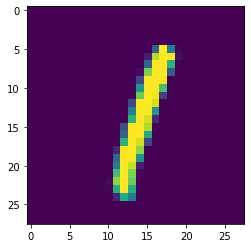

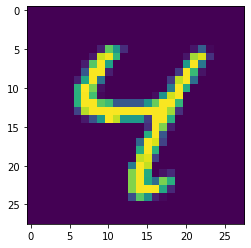

In [ ]:
for corr in range(7):
    plt.imshow(xtestdata[corr].reshape(28, 28))
    plt.show()

The above images are correctly classified by the MLP neural network. By closer visual inspection it is obvious that the model is right in classifying them.

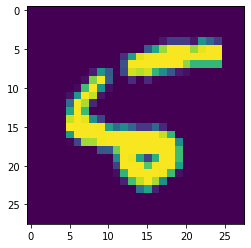

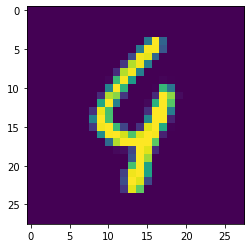

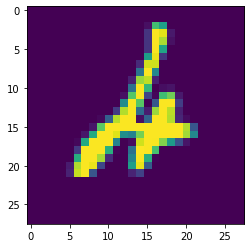

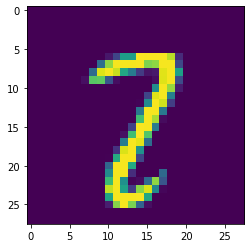

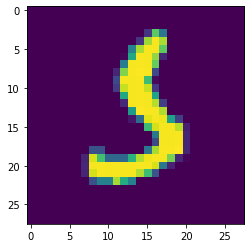

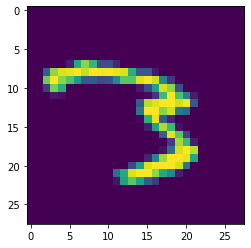

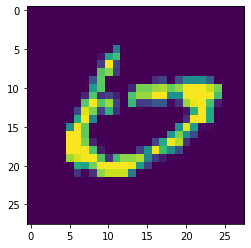

In [ ]:
for mis in false_classification[0:7]:
    plt.imshow(xtestdata[mis].reshape(28, 28))
    plt.show()

The above images are wrongly classified by the MLP neural network. After close inspection, it is evident that the above images are visually confusing. For instance, the first image could be a '5' or '6', second image could be a '4' or '9', and the last image could be a '0' or '6'.  